# 과제 1

In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(123)
df = pd.DataFrame({'col_1': np.random.randint(20, size=20), 
                   'col_2': np.random.randn(20)})

In [3]:
df

,col_1,col_2
0,13,1.730024
1,2,1.232650
2,2,-0.823598
3,6,-0.118201
4,17,-0.576103
5,19,1.695731
6,10,-0.074394
7,1,-1.900637
8,0,-0.777655
9,17,1.313462


 ## (1) pd.cut : 동일 길이로 나누어서 범주 만들기(equal-length buckets categorization)
출처: https://rfriend.tistory.com/404?category=675917 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

In [4]:
factor_col_1 = pd.cut(df.col_1, 4)

In [5]:
factor_col_1

0       (9.5, 14.25]
1     (-0.019, 4.75]
2     (-0.019, 4.75]
3        (4.75, 9.5]
4      (14.25, 19.0]
5      (14.25, 19.0]
6       (9.5, 14.25]
7     (-0.019, 4.75]
8     (-0.019, 4.75]
9      (14.25, 19.0]
10     (14.25, 19.0]
11       (4.75, 9.5]
12    (-0.019, 4.75]
13      (9.5, 14.25]
14    (-0.019, 4.75]
15     (14.25, 19.0]
16     (14.25, 19.0]
17      (9.5, 14.25]
18    (-0.019, 4.75]
19    (-0.019, 4.75]
Name: col_1, dtype: category
Categories (4, interval[float64, right]): [(-0.019, 4.75] < (4.75, 9.5] < (9.5, 14.25] < (14.25, 19.0]]

In [9]:
result_df_1 = df.col_1.groupby(factor_col_1).agg(['count', 'mean', 'std', 'min', 'max'])
result_df_1

,count,mean,std,min,max
col_1,,,,,
"(-0.019, 4.75]",8,1.125,1.457738,0,4
"(4.75, 9.5]",2,7.500,2.121320,6,9
"(9.5, 14.25]",4,12.750,1.892969,10,14
"(14.25, 19.0]",6,17.000,1.788854,15,19


## 위와 동일한 결과를 아래 처럼 통계집계를 하는 사용자정의함수와 apply() 를 사용해서 구할 수도 있습니다. 


In [13]:
def summary_func(group):
    return {'count': group.count(), 
             'mean': group.mean(), 
             'std': group.std(), 
             'min': group.min(), 
             'max': group.max()}

df.col_1.groupby(factor_col_1).apply(summary_func)            

col_1                
(-0.019, 4.75]  count     8.000000
                mean      1.125000
                std       1.457738
                min       0.000000
                max       4.000000
(4.75, 9.5]     count     2.000000
                mean      7.500000
                std       2.121320
                min       6.000000
                max       9.000000
(9.5, 14.25]    count     4.000000
                mean     12.750000
                std       1.892969
                min      10.000000
                max      14.000000
(14.25, 19.0]   count     6.000000
                mean     17.000000
                std       1.788854
                min      15.000000
                max      19.000000
Name: col_1, dtype: float64

In [14]:
result_df2 = df.col_1.groupby(factor_col_1).apply(summary_func)   

In [15]:
result_df2.unstack()

,count,mean,std,min,max
col_1,,,,,
"(-0.019, 4.75]",8.0,1.125,1.457738,0.0,4.0
"(4.75, 9.5]",2.0,7.500,2.121320,6.0,9.0
"(9.5, 14.25]",4.0,12.750,1.892969,10.0,14.0
"(14.25, 19.0]",6.0,17.000,1.788854,15.0,19.0


# 과제 1-2

In [16]:
np.random.seed(123)
df = pd.DataFrame({'col_1': np.random.randint(20, size=20), 
                   'col_2': np.random.randn(20)})

In [17]:
df

,col_1,col_2
0,13,1.730024
1,2,1.232650
2,2,-0.823598
3,6,-0.118201
4,17,-0.576103
5,19,1.695731
6,10,-0.074394
7,1,-1.900637
8,0,-0.777655
9,17,1.313462


labels=np.arange(4, 0, -1)로 직접 지정을 해주면 label이 4, 3, 2, 1 이런식으로 4부터 1씩 줄어드는 순서로 할당이 됩니다. 위의 label 과 정 반대로 할당이 되었습니다. 


In [25]:
bucket_qcut_col_2 = pd.qcut(df.col_2, 4, labels=np.arange(4, 0, -1)) #labels=False
bucket_qcut_col_2

0     1
1     1
2     4
3     2
4     3
5     1
6     2
7     4
8     3
9     1
10    1
11    4
12    4
13    3
14    3
15    3
16    2
17    2
18    4
19    2
Name: col_2, dtype: category
Categories (4, int64): [4 < 3 < 2 < 1]

In [24]:
df.col_2.groupby(bucket_qcut_col_2).agg(['count', 'mean', 'std', 'min', 'max'])

,count,mean,std,min,max
col_2,,,,,
4,5,-1.612369,0.907474,-3.055577,-0.823598
3,5,-0.522940,0.201746,-0.777655,-0.308209
2,5,0.542247,0.589903,-0.118201,1.070781
1,5,1.555265,0.262163,1.232650,1.804458


# 과제 2

In [27]:
# making DataFrame with 4 random variables
np.random.seed(123) # for reproducibility
df= pd.DataFrame(np.random.randn(10, 4), 
                    columns=['a', 'b', 'c', 'd'])

# setting index with 2 group, 'grp1' and 'grp2'
df['group'] = ['grp1', 'grp1', 'grp1', 'grp1', 'grp1', 
               'grp2', 'grp2', 'grp2', 'grp2', 'grp2']

df = df.set_index('group')

In [28]:
df

,a,b,c,d
group,,,,
grp1,-1.085631,0.997345,0.282978,-1.506295
grp1,-0.578600,1.651437,-2.426679,-0.428913
grp1,1.265936,-0.866740,-0.678886,-0.094709
grp1,1.491390,-0.638902,-0.443982,-0.434351
grp1,2.205930,2.186786,1.004054,0.386186
grp2,0.737369,1.490732,-0.935834,1.175829
grp2,-1.253881,-0.637752,0.907105,-1.428681
grp2,-0.140069,-0.861755,-0.255619,-2.798589
grp2,-1.771533,-0.699877,0.927462,-0.173636


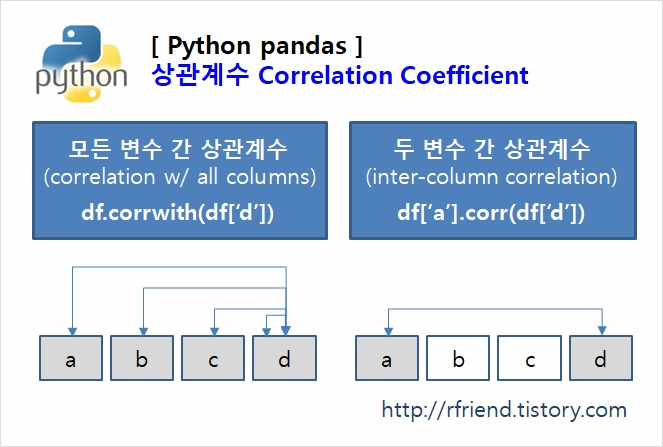

In [38]:
from IPython.display import Image
Image("990379415C209F1D27.jpg")

## (1) 'd' 변수와 나머지 모든 변수 간 그룹 별 상관계수 구하기 : x.corrwith(x['d'])


In [29]:
corr_with_d = lambda x: x.corrwith(x['d'])
grouped = df.groupby('group')
grouped.apply(corr_with_d) 

,a,b,c,d
group,,,,
grp1,0.846822,0.099417,0.089205,1.0
grp2,0.307477,0.832473,-0.390469,1.0


## (2) a와 d 변수간의 상관계수 구하기


In [43]:
corr_a_d = lambda x:x['a'].corr(x['d'])
grouped = df.groupby('group')
grouped.apply(corr_a_d)

group
grp1    0.846822
grp2    0.307477
dtype: float64

# 과제 3

In [44]:
from sklearn import datasets, linear_model

In [45]:
diabetes = datasets.load_diabetes()

위의 diabetes 데이터의 attribute 를 활용하여, 아래와 같은 diabetes_df를 만들어보세요
target 컬럼은 종속변수, age, sex, bmi 는 독립변수에 해당합니다.

In [50]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [57]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [58]:
diabetes.target[:5]

array([151.,  75., 141., 206., 135.])

In [59]:
diabetes_Y = pd.DataFrame(diabetes.target, columns = ['target'])
diabetes_X = pd.DataFrame(diabetes.data[:, 0:3], 
                          columns = ['age', 'sex', 'bmi'])

In [60]:
diabetes_df = pd.concat([diabetes_Y, diabetes_X], axis=1)
diabetes_df[:5]

,target,age,sex,bmi
0,151.0,0.038076,0.050680,0.061696
1,75.0,-0.001882,-0.044642,-0.051474
2,141.0,0.085299,0.050680,0.044451
3,206.0,-0.089063,-0.044642,-0.011595
4,135.0,0.005383,-0.044642,-0.036385


In [61]:
diabetes_df['grp'] = np.where(diabetes_df['sex'] > 0, 'M', 'F')
diabetes_df.drop(columns=['sex'], inplace=True) 
diabetes_df[:3]

,target,age,bmi,grp
0,151.0,0.038076,0.061696,M
1,75.0,-0.001882,-0.051474,F
2,141.0,0.085299,0.044451,M


GroupBy()의 apply()에 사용할 선형회귀모형 사용자 정의 함수(UDF)를 정의해보겠습니다. 각 그룹별 age와 bmi변수의 회귀계수를 비교하고 싶다고 했으므로 사용자 정의 함수에서 그룹별 회귀모형의 회귀계수와 절편을 결과로 반환하도록 하였습니다. 

출처: https://rfriend.tistory.com/406?category=675917 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

In [62]:
def lin_regress(data, yvar, xvars):
    # output, input variables
    Y = data[yvar]
    X = data[xvars]
    linreg = linear_model.LinearRegression()  

    # Fit the linear regression model
    model = linreg.fit(X, Y)
    # Get the intercept and coefficients
    intercept = model.intercept_
    coef = model.coef_
    result = [intercept, coef]   

    return result

In [63]:
grouped = diabetes_df.groupby('grp')
lin_reg_coef = grouped.apply(lin_regress, 'target', ['age', 'bmi'])

In [64]:
lin_reg_coef

grp
F    [152.40684676047456, [23.199210147823894, 814....
M    [148.21507864445124, [291.7563226838977, 1092....
dtype: object

In [65]:
lin_reg_coef['M']

[148.21507864445124, array([ 291.75632268, 1092.80118705])]

In [66]:
lin_reg_coef['F']

[152.40684676047456, array([ 23.19921015, 814.50932703])]

# 과제 4

In [67]:
# setting seed number for reproducibility
np.random.seed(123)

# Make a DataFrame
df = pd.DataFrame({'grp': ['grp_1']*10 + ['grp_2']*10, 
                          'col_1': np.random.randint(20, size=20), 
                          'col_2': np.random.randint(20, size=20)})

In [68]:
def sampling_func(data, sample_pct):
    np.random.seed(123)
    N = len(data)
    sample_n = int(len(data)*sample_pct) 
    sample = data.take(np.random.permutation(N)[:sample_n])
    return sample

In [69]:
sample_set = df.groupby('grp').apply(sampling_func, sample_pct=0.8)
sample_set.sort_index()

grp  col_1  col_2
grp                          
grp_1 0   grp_1     13     16
      1   grp_1      2      4
      3   grp_1      6      3
      4   grp_1     17      2
      5   grp_1     19      7
      6   grp_1     10      2
      7   grp_1      1     15
      8   grp_1      0     16
grp_2 10  grp_2     15      9
      11  grp_2      9      3
      13  grp_2     14      1
      14  grp_2      0      2
      15  grp_2     15      1
      16  grp_2     19     12
      17  grp_2     14      8
      18  grp_2      4      3

# 과제 5

In [70]:
group_1 = ['A', 'B'] * 20
group_2 = ['C', 'D', 'E', 'F'] * 10
group_3 = ['G', 'H', 'I', "J", 'K', 'L', 'M', 'N'] * 5

df = pd.DataFrame({'group_1': group_1,
                   'group_2': group_2,
                   'group_3': group_3,
                   'col_1': np.random.randn(40),
                   'col_2': np.random.randn(40),
                   'col_3': np.random.randn(40),
                   'col_4': np.random.randn(40)})

df.sort_values(by=['group_1', 'group_2', 'group_3'], axis=0)

,group_1,group_2,group_3,col_1,col_2,col_3,col_4
0,A,C,G,1.595301,0.768126,0.451372,0.758383
8,A,C,G,1.730024,-0.534505,0.301245,-0.685031
16,A,C,G,-0.777655,-1.814567,0.230677,1.913999
24,A,C,G,0.827117,0.446992,0.149555,-1.928535
32,A,C,G,-1.582940,-0.526510,-2.656512,-1.001390
4,A,C,K,-1.479645,0.738600,0.883113,0.123483
12,A,C,K,-0.576103,-1.237142,2.348094,1.855988
20,A,C,K,-1.316480,0.890952,-1.747135,-2.324336
28,A,C,K,-1.765056,0.882312,-0.041396,0.893222
36,A,C,K,1.434229,0.909587,0.520719,0.831080


## 그룹별 두 개 변수간 상관관계를 구하는 사용자 정의 함수

In [71]:
def corr_group(df, var_1, var_2, group_list):

    # correlaiton fuction with 2 variables
    corr_func = lambda g: g[var_1].corr(g[var_2])    
    # GroupBy operator

    grouped = df.groupby(group_list)  

    # calculate correlation coefficient by Group

    corr_coef_df = pd.DataFrame(grouped.apply(corr_func), columns=['corr_coef'])    

    # add var_1, var_2 column names

    corr_coef_df['var1'] = var_1
    corr_coef_df['var2'] = var_2  

    return corr_coef_df


## (3) 다수 그룹별 다수 변수 간 두개 씩 쌍을 이루어 상관계수 구하기

'group_1', 'group_2', 'group_3' 의 3개의 그룹 변수로 만들어진 모든 경우의 수의 그룹 조합에 대해서, 'col_1', 'col_2', 'col_3', 'col_4'의 4개 연속형 변수로 2개씩 쌍(pair)을 이루어 만들어진 모든 경우의 수의 조합, 즉, ('col_1', 'col_2'), ('col_1', 'col_3'), ('col_1', 'col_4'), ('col_2', 'col_3'), ('col_2', 'col_4'), ('col_3', 'col_4') 의 4C2=6개의 조합별 상관계수를 구해보겠습니다. 



이때 위의 (2)번에서 만들었던 '두 개 쌍의 변수간 상관계수 구하는 사용자 정의함수'인 corr_group() 함수를 사용하여 for loop 문으로 6개의 연속형 변수의 조합별로 상관계수를 구한 후에, corr_coef_df_all 데이터 프레임에 append 해나가는 방식을 사용하였습니다. 



출처: https://rfriend.tistory.com/423?category=675917 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

In [72]:
corr_coef_df_all = pd.DataFrame()

group_list = ['group_1', 'group_2', 'group_3']
col_list = ['col_1', 'col_2', 'col_3', 'col_4']

from itertools import combinations
comb = combinations(col_list, 2)

for var in list(comb):
    corr_tmp = corr_group(df, var[0], var[1], group_list)
    corr_coef_df_all = corr_coef_df_all.append(corr_tmp)

corr_coef_df_all[['var1', 'var2', 'corr_coef']]

var1   var2  corr_coef
group_1 group_2 group_3                         
A       C       G        col_1  col_2   0.588459
                K        col_1  col_2  -0.038774
        E       I        col_1  col_2   0.749962
                M        col_1  col_2   0.331671
B       D       H        col_1  col_2  -0.342275
                L        col_1  col_2  -0.055047
        F       J        col_1  col_2   0.170637
                N        col_1  col_2  -0.083316
A       C       G        col_1  col_3   0.763188
                K        col_1  col_3   0.248967
        E       I        col_1  col_3  -0.374071
                M        col_1  col_3   0.376088
B       D       H        col_1  col_3   0.634277
                L        col_1  col_3  -0.721181
        F       J        col_1  col_3  -0.089051
                N        col_1  col_3  -0.696641
A       C       G        col_1  col_4  -0.126677
                K        col_1  col_4   0.299497
        E       I        col_1  col_4   0.645773
                M        col_1  col_4  -0.378222
B       D       H        col_1  col_4   0.810579
                L        col_1  col_4  -0.521801
        F       J        col_1  col_4   0.182420
                N        col_1  col_4   0.969937
A       C       G        col_2  col_3   0.136100
                K        col_2  col_3  -0.757795
        E       I        col_2  col_3  -0.398297
                M        col_2  col_3   0.613420
B       D       H        col_2  col_3   0.434114
                L        col_2  col_3  -0.441791
        F       J        col_2  col_3  -0.488695
                N        col_2  col_3  -0.018590
A       C       G        col_2  col_4  -0.515430
                K        col_2  col_4  -0.562726
        E       I        col_2  col_4   0.765580
                M        col_2  col_4  -0.294329
B       D       H        col_2  col_4  -0.401541
                L        col_2  col_4  -0.769624
        F       J        col_2  col_4  -0.681308
                N        col_2  col_4  -0.008317
A       C       G        col_3  col_4   0.331663
                K        col_3  col_4   0.892440
        E       I        col_3  col_4  -0.157261
                M        col_3  col_4   0.003874
B       D       H        col_3  col_4   0.523554
                L        col_3  col_4   0.711030
        F       J        col_3  col_4   0.447970
                N        col_3  col_4  -0.688664